## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  12.093985   433.516493  0.061755  10.556169    29.620097
1  99.925686  1242.286812  0.309227   8.281393   396.875670
2  38.664497   173.720545  0.273881   4.519914    61.370192
3  86.121437  1585.573853  0.701761  10.078017  1115.980992
4  77.142386   168.493946  0.604011   6.543815   127.977158


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0268812	total: 57.9ms	remaining: 57.9s
1:	learn: 1.0142324	total: 58.4ms	remaining: 29.2s
2:	learn: 1.0041042	total: 59ms	remaining: 19.6s
3:	learn: 0.9936826	total: 59.9ms	remaining: 14.9s
4:	learn: 0.9768046	total: 60.3ms	remaining: 12s
5:	learn: 0.9635529	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9499380	total: 61.3ms	remaining: 8.7s
7:	learn: 0.9377617	total: 61.9ms	remaining: 7.68s
8:	learn: 0.9235432	total: 62.4ms	remaining: 6.87s
9:	learn: 0.9093728	total: 63.1ms	remaining: 6.25s
10:	learn: 0.8984794	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8846327	total: 64ms	remaining: 5.26s
12:	learn: 0.8709036	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8579516	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8449889	total: 65.4ms	remaining: 4.3s
15:	learn: 0.8341767	total: 66ms	remaining: 4.06s
16:	learn: 0.8226592	total: 66.5ms	remaining: 3.84s
17:	learn: 0.8125445	total: 67ms	remaining: 3.66s
18:	learn: 0.8033807	total: 67.4ms	remaining: 3.48s
19:	

125:	learn: 0.2166156	total: 113ms	remaining: 785ms
126:	learn: 0.2148201	total: 114ms	remaining: 783ms
127:	learn: 0.2126460	total: 114ms	remaining: 779ms
128:	learn: 0.2105808	total: 115ms	remaining: 775ms
129:	learn: 0.2085292	total: 115ms	remaining: 771ms
130:	learn: 0.2066365	total: 116ms	remaining: 767ms
131:	learn: 0.2047670	total: 116ms	remaining: 763ms
132:	learn: 0.2029560	total: 117ms	remaining: 760ms
133:	learn: 0.2010278	total: 117ms	remaining: 756ms
134:	learn: 0.1993389	total: 117ms	remaining: 752ms
135:	learn: 0.1974174	total: 118ms	remaining: 750ms
136:	learn: 0.1950418	total: 118ms	remaining: 746ms
137:	learn: 0.1933313	total: 119ms	remaining: 743ms
138:	learn: 0.1914439	total: 119ms	remaining: 739ms
139:	learn: 0.1894912	total: 120ms	remaining: 736ms
140:	learn: 0.1878653	total: 120ms	remaining: 733ms
141:	learn: 0.1857058	total: 121ms	remaining: 730ms
142:	learn: 0.1840585	total: 121ms	remaining: 727ms
143:	learn: 0.1818894	total: 122ms	remaining: 723ms
144:	learn: 

282:	learn: 0.0618484	total: 185ms	remaining: 469ms
283:	learn: 0.0614518	total: 185ms	remaining: 468ms
284:	learn: 0.0610327	total: 186ms	remaining: 467ms
285:	learn: 0.0605821	total: 186ms	remaining: 466ms
286:	learn: 0.0602031	total: 187ms	remaining: 464ms
287:	learn: 0.0597771	total: 187ms	remaining: 463ms
288:	learn: 0.0593804	total: 188ms	remaining: 462ms
289:	learn: 0.0590229	total: 189ms	remaining: 462ms
290:	learn: 0.0586709	total: 189ms	remaining: 461ms
291:	learn: 0.0582911	total: 190ms	remaining: 459ms
292:	learn: 0.0578655	total: 190ms	remaining: 458ms
293:	learn: 0.0576015	total: 190ms	remaining: 457ms
294:	learn: 0.0572031	total: 191ms	remaining: 456ms
295:	learn: 0.0567312	total: 191ms	remaining: 455ms
296:	learn: 0.0565112	total: 192ms	remaining: 454ms
297:	learn: 0.0561747	total: 192ms	remaining: 452ms
298:	learn: 0.0559172	total: 192ms	remaining: 451ms
299:	learn: 0.0555863	total: 193ms	remaining: 450ms
300:	learn: 0.0552646	total: 193ms	remaining: 449ms
301:	learn: 

516:	learn: 0.0203926	total: 295ms	remaining: 275ms
517:	learn: 0.0202880	total: 295ms	remaining: 275ms
518:	learn: 0.0201992	total: 296ms	remaining: 274ms
519:	learn: 0.0201096	total: 296ms	remaining: 273ms
520:	learn: 0.0200428	total: 297ms	remaining: 273ms
521:	learn: 0.0199530	total: 297ms	remaining: 272ms
522:	learn: 0.0198659	total: 298ms	remaining: 272ms
523:	learn: 0.0197773	total: 298ms	remaining: 271ms
524:	learn: 0.0196919	total: 299ms	remaining: 270ms
525:	learn: 0.0195998	total: 299ms	remaining: 269ms
526:	learn: 0.0195179	total: 299ms	remaining: 269ms
527:	learn: 0.0194345	total: 300ms	remaining: 268ms
528:	learn: 0.0193446	total: 300ms	remaining: 267ms
529:	learn: 0.0192642	total: 301ms	remaining: 267ms
530:	learn: 0.0191561	total: 301ms	remaining: 266ms
531:	learn: 0.0190731	total: 302ms	remaining: 265ms
532:	learn: 0.0189833	total: 302ms	remaining: 265ms
533:	learn: 0.0189054	total: 302ms	remaining: 264ms
534:	learn: 0.0188124	total: 303ms	remaining: 263ms
535:	learn: 

671:	learn: 0.0105665	total: 366ms	remaining: 179ms
672:	learn: 0.0105387	total: 367ms	remaining: 178ms
673:	learn: 0.0104813	total: 367ms	remaining: 178ms
674:	learn: 0.0104521	total: 368ms	remaining: 177ms
675:	learn: 0.0104264	total: 368ms	remaining: 176ms
676:	learn: 0.0103907	total: 369ms	remaining: 176ms
677:	learn: 0.0103654	total: 369ms	remaining: 175ms
678:	learn: 0.0103498	total: 370ms	remaining: 175ms
679:	learn: 0.0102944	total: 370ms	remaining: 174ms
680:	learn: 0.0102402	total: 370ms	remaining: 173ms
681:	learn: 0.0102158	total: 371ms	remaining: 173ms
682:	learn: 0.0101710	total: 371ms	remaining: 172ms
683:	learn: 0.0101272	total: 372ms	remaining: 172ms
684:	learn: 0.0100922	total: 372ms	remaining: 171ms
685:	learn: 0.0100494	total: 373ms	remaining: 171ms
686:	learn: 0.0100196	total: 373ms	remaining: 170ms
687:	learn: 0.0099963	total: 374ms	remaining: 169ms
688:	learn: 0.0099703	total: 374ms	remaining: 169ms
689:	learn: 0.0099322	total: 375ms	remaining: 168ms
690:	learn: 

913:	learn: 0.0053019	total: 478ms	remaining: 44.9ms
914:	learn: 0.0052924	total: 478ms	remaining: 44.4ms
915:	learn: 0.0052830	total: 479ms	remaining: 43.9ms
916:	learn: 0.0052573	total: 479ms	remaining: 43.4ms
917:	learn: 0.0052480	total: 479ms	remaining: 42.8ms
918:	learn: 0.0052360	total: 480ms	remaining: 42.3ms
919:	learn: 0.0052148	total: 481ms	remaining: 41.8ms
920:	learn: 0.0052067	total: 481ms	remaining: 41.3ms
921:	learn: 0.0051968	total: 481ms	remaining: 40.7ms
922:	learn: 0.0051888	total: 482ms	remaining: 40.2ms
923:	learn: 0.0051798	total: 482ms	remaining: 39.7ms
924:	learn: 0.0051658	total: 483ms	remaining: 39.1ms
925:	learn: 0.0051411	total: 483ms	remaining: 38.6ms
926:	learn: 0.0051241	total: 484ms	remaining: 38.1ms
927:	learn: 0.0051039	total: 484ms	remaining: 37.6ms
928:	learn: 0.0050968	total: 485ms	remaining: 37.1ms
929:	learn: 0.0050898	total: 486ms	remaining: 36.5ms
930:	learn: 0.0050731	total: 486ms	remaining: 36ms
931:	learn: 0.0050653	total: 486ms	remaining: 35

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


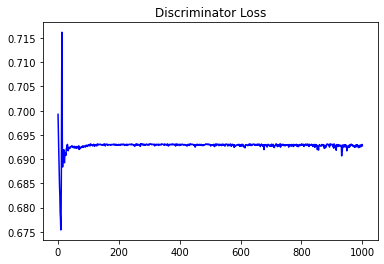

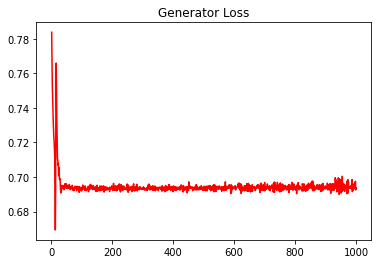

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01512955124963357


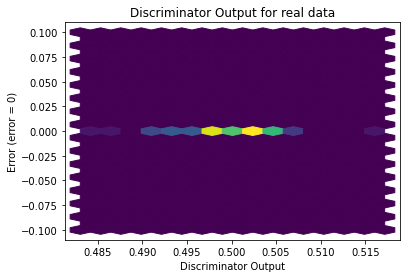

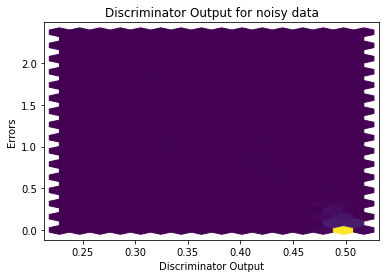

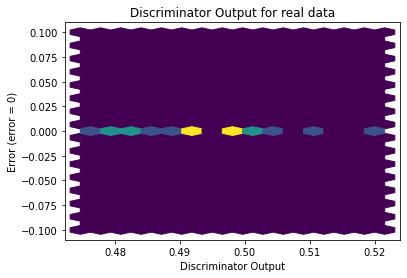

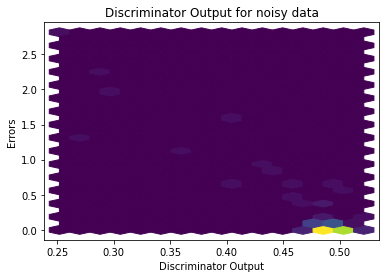

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8777]], requires_grad=True)
